In [1]:
import pandas as pd
import numpy as np
from scipy import stats

## 1. 통계적 가설검정

### 1.1 가설 검정(단측)

감자튀김 무게의 평균값 검증

In [5]:
df = pd.read_csv('ch11_potato.csv')
sample = np.array(df.iloc[:,0])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [6]:
s_mean = np.mean(sample)
s_mean

128.4507142857143

모평균 130, 모분산 9 가정

In [8]:
rv = stats.norm(130, np.sqrt(9/14))
rv.isf(0.95)

128.68118313069039

P(X<=128.681) = 0.05

표본평균이 128.451인 경우, 모평균이 130보다 작다라는 가설 검증

귀무가설 : 모평균은 130g 이다  대립가설 : 모평균은 130g보다 작다

In [9]:
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932298779026813

In [10]:
rv = stats.norm()
rv.isf(0.95)

-1.6448536269514722

검정통계량이 임곗값보다 작으므로 귀무가설 기각(평균은 130g보다 작다)

In [11]:
rv.cdf(z)

0.026661319523126635

p값은 0.027로 0.05보다 작음, 귀무가설 기각

### 1.2 가설 검정(양측)

In [12]:
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932298779026813

In [13]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

귀무가설 채택(평균이 130이다)

In [14]:
rv.cdf(z) * 2

0.05332263904625327

p값은 0.053으로 0.05보다 큼, 귀무가설 채택

### 1.3 가설검정의 두가지 오류

#### - 제1종 오류 : 귀무가설이 옳을 때, 귀무가설을 기각하는 오류(False Positive)

In [15]:
rv = stats.norm(130, 3) ##모집단의 확률분포 N(130, 3^2)

norm.rvs() 함수는 정규확률분포로부터 난수를 생성

In [16]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples

0.0505

제 1종 오류를 범할 확률(위험률) alpha = 0.0505

#### - 제 2종 오류 : 대립가설이 옳을 때, 귀무가설을 채택하는 오류(False Negative)

실제 평균은 128임을 가정

In [17]:
rv = stats.norm(128, 3)

In [19]:
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
cnt / n_samples

0.1902

제 2정 오류를 범할 확률 β = 0.1902, 1-β = 검정력

## 2. 기본적인 가설검정

### 2.1 정규분포의 모평균에 대한 검정(모분산을 알고 있는 경우)

귀무가설 : u = u0, 대립가설 : u != u0

Z = (X-u)/sqrt(sig^2/n)

z_1-alpha/2 < Z < z_alpha/2 인 경우 귀무가설 채택

In [22]:
def pmean_test(sample, mean0, p_var, alpha = 0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)
    
    z = (s_mean - mean0) / np.sqrt(p_var / n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1-rv.cdf(z)) * 2
        
    print(f'p값은 {p:.3f}')

 norm.cdf() : 확률밀도함수의 누적밀도를 구하는 함수

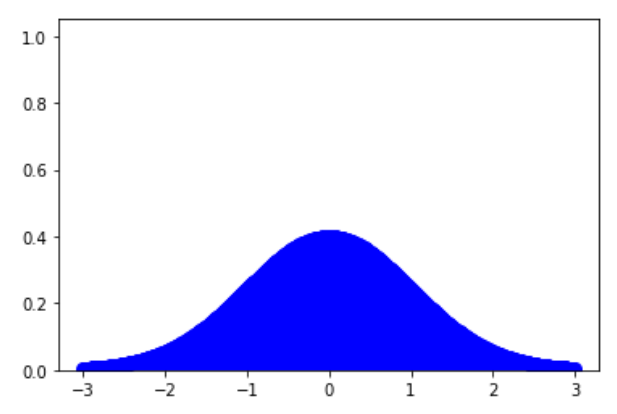

In [23]:
pmean_test(sample, 130, 9)

귀무가설 채택
p값은 0.053


### 2.2 정규분포의 모분산에 대한 검정

모분산이 어떤 값 sigma^2이 아닌것을 주장하기 위한 검정

Y = (n-1)*s^2 / sigma^2 를 검정통계량으로 사용

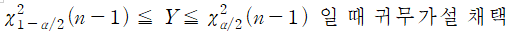

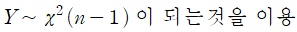

In [24]:
def pvar_test(sample, var0, alpha=0.05):
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.chi2(df = n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1) * u_var / var0
    if interval[0] <= y <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if y < rv.isf(0.5):
        p = rv.cdf(y) * 2
    else:
        p = (1-rv.cdf(y)) * 2
        
    print(f'p값은 {p:.3f}')

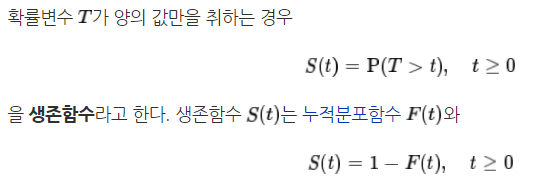

In [25]:
pvar_test(sample, 9)

귀무가설 채택
p값은 0.085


### 2.3 정규분포의 모평균에 대한 검정(모분산을 모르는 경우)

1표본 t검정, 자유도가 n-1인 t분포를 따름

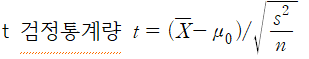

In [26]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df = n-1)
    interval = rv.interval(1-alpha)
    
    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
        
    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1-rv.cdf(t)) * 2
        
    print(f'p값은 {p:.3f}')

In [27]:
pmean_test(sample, 130)

귀무가설 채택
p값은 0.169


In [28]:
t, p = stats.ttest_1samp(sample, 130)

In [29]:
t, p

(-1.4551960206404198, 0.16933464230414275)

## 3. 2표본 문제에 관한 가설 검정

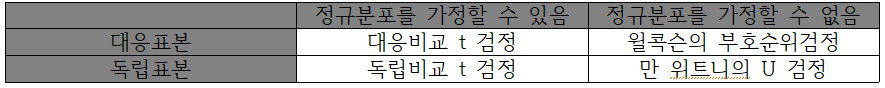

### 3.1 대응비교 t 검정

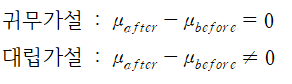

In [31]:
training_rel = pd.read_csv('ch11_training_rel.csv')
training_rel.columns = ['전','후']
training_rel.head()

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [32]:
training_rel['차'] = training_rel['전'] - training_rel['후']

In [35]:
t, p = stats.ttest_1samp(training_rel['차'], 0)
print('p value : {}'.format(p))
if p < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p value : 0.04004419061842953
귀무가설 기각


In [37]:
t, p = stats.ttest_rel(training_rel['후'] , training_rel['전'])

print('p value : {}'.format(p))
if p < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p value : 0.04004419061842953
귀무가설 기각


### 3.2 독립비교 t 검정

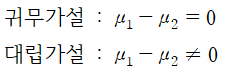

In [38]:
training_ind = pd.read_csv('ch11_training_ind.csv')
training_ind.head()

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [40]:
t, p = stats.ttest_ind(training_ind['A'], training_ind['B'], equal_var=False) ##equal_var=False ->  웰치의 방법
print('p value : {}'.format(p))
if p < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p value : 0.08695731107259362
귀무가설 채택


### 3.3 윌콕슨의 부호순위검정

대응표본에서 차이에 정규분포를 가정할 수 없는 경우, 중앙값의 차이에 대한 검정

In [49]:
training_rel = pd.read_csv('ch11_training_rel.csv')
training_rel.columns = ['before','after']

In [52]:
train_ex = training_rel[:6].copy()

In [53]:
diff = train_ex['after'] - train_ex['before']
train_ex['difference'] = diff

In [54]:
rank = stats.rankdata(abs(diff)).astype(int)
train_ex['rank'] = rank

In [55]:
train_ex

,before,after,difference,rank
0,59,41,-18,5
1,52,63,11,3
2,55,68,13,4
3,61,59,-2,1
4,59,84,25,6
5,45,37,-8,2


In [56]:
r_minus = np.sum((diff < 0) * rank)
r_plus = np.sum((diff > 0) * rank)

In [57]:
r_minus, r_plus

(8, 13)

두 값중 작은 쪽이 검정통계량 값이 됨, 이 검정통계량이 임곗값보다 작은 경우 귀무가설이 기각되는 단측검정 수행

차이에 편향이 생길 경우 r_minus와 r_plus에도 편행이 생기고 검정통계량은 작아짐. 이ㅔ 따라 검정통계량이 임계값보다 작으면 중앙값에 차이가 있음을 주장

In [58]:
T, p = stats.wilcoxon(training_rel['before'], training_rel['after'])
print('p value : {}'.format(p))
if p < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p value : 0.03623390197753906
귀무가설 기각


In [60]:
T, p = stats.wilcoxon(training_rel['after'] - training_rel['before'])
print('p value : {}'.format(p))
if p < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p value : 0.039989471435546875
귀무가설 기각


윌콕슨의 부호순위검정은 모집단이 정규분포인 경우에도 사용 가능, 대응표본 t 검정에 비해 검정력은 낮음

In [61]:
n = 10000
diffs = np.round(stats.norm(3, 4).rvs(size = (n, 20)))

In [62]:
cnt = 0
alpha = 0.05
for diff in diffs:
    t, p = stats.ttest_1samp(diff, 0)
    if p < alpha:
        cnt += 1
cnt / n

0.8886

In [63]:
cnt = 0
alpha = 0.05
for diff in diffs:
    t, p = stats.wilcoxon(diff)
    if p < alpha:
        cnt += 1
cnt / n

C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


0.879

### 3.4 만 위트니의 U 검정

대응되는 데이터가 없는 2표본 모집단에 정규분포를 가정할 수 없는 경우, 중앙값의 차이에 대한 검정

In [64]:
training_ind = pd.read_csv('ch11_training_ind.csv')
ex_ind = training_ind[:5].copy()

In [66]:
rank = stats.rankdata(np.concatenate([ex_ind['A'], ex_ind['B']]))
rank_df = pd.DataFrame({'A':rank[:5],
                       'B':rank[5:10]}).astype(int)
rank_df

,A,B
0,3,5
1,6,8
2,1,9
3,10,4
4,2,7


U 검정의 통계량은 A에 관한 순위합에서 A의 크기를 n으로 해서 n(n+1)/2를 뺀것

In [ ]:
(3+6+1+10+2) - (5 * 6)/2

In [68]:
n1 = len(rank_df['A'])
u  = rank_df['A'].sum() - (n1 * (n1+1))/2
u

7.0

좋은 순위 혹은 나쁜 순위가 모여있는 경우에도 중앙값에는 편향이 있음 -> 양측검정 수행

In [70]:
u, p = stats.mannwhitneyu(training_ind['A'], training_ind['B'], alternative = 'two-sided')
print('p value : {}'.format(p))
if p < 0.05:
    print('귀무가설 기각')
else:
    print('귀무가설 채택')

p value : 0.05948611166127324
귀무가설 채택


정규분포를 따르는 경우 독립비교 t검정에 비해 검정력 저하

### 3.5 카이제곱 검정


독립성 검정 : 두 변수 X와 Y에 관해서 'X와 Y가 독립이다' 라는 귀무가설 검정, 카이제곱분포 사용

In [73]:
ad = pd.read_csv('ch11_ad.csv')
ad.columns = ['광고', '구입']
n = len(ad)
for i in range(n):
    if ad['구입'][i] == 'しなかった':
        ad['구입'][i] = '하지 않았다'
    else:
        ad['구입'][i] = '했다'
ad.head()

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [74]:
ad_cross = pd.crosstab(ad['광고'], ad['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [75]:
ad_cross['했다'] / (ad_cross['했다'] + ad_cross['하지 않았다'])

광고
A    0.1225
B    0.0850
dtype: float64

In [78]:
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(900, 100)

In [77]:
n_adA, n_adB = ad_cross.sum(axis = 1)
n_adA, n_adB

(400, 600)

In [82]:
ad_ef = pd.DataFrame({'했다':[n_adA * n_yes / n, n_adB * n_yes / n],
                     '하지 않았다':[n_adA * n_not / n, n_adB * n_not / n]},
                    index = ['A','B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [83]:
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.75

Y는 자유도(n-1)가 1인 카이제곱분포를 근사적으로 따름.

In [84]:
rv = stats.chi2(1)
1-rv.cdf(y)

0.052807511416113395

In [86]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof

(3.75, 0.052807511416113395, 1)

In [87]:
ef

array([[360.,  40.],
       [540.,  60.]])